In [ ]:
# import pandas as pd 
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np
# from sklearn.model_selection import train_test_split
# X = pd.read_csv('/gdrive/MyDrive/cleaned_training_data_01.csv')
# X['average_delay'] = X['carrier_delay'] + X['nas_delay'] + X['late_aircraft_delay']
# X = X[['crs_arr_time','actual_elapsed_time','distance','year','month','day','weekday','average_delay']]
# y = X['arr_delay']
# reg = RandomForestRegressor(n_estimators=100)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# reg.fit(X_train,y_train)

# y_pred=reg.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# rmse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.utils import shuffle

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Regression_no_outliers_cleaned_data_01.csv')

In [ ]:
df

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dep_time,dep_delay,dest,arr_time,arr_delay,crs_arr_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,weekday
0,2018-08-26,AS,AS,PDX,1717.0,-3.0,LAX,1936.0,-5.0,1941,139.0,834.0,0.0,0.0,0.0,0.0,0.0,2018,8,26,1.0
1,2018-05-24,UA,OO,DEN,1750.0,0.0,PSP,1913.0,3.0,1910,143.0,776.0,0.0,0.0,0.0,0.0,0.0,2018,5,24,0.0
2,2019-01-10,AA,PT,CLT,1105.0,-4.0,ROA,1200.0,-16.0,1216,55.0,155.0,0.0,0.0,0.0,0.0,0.0,2019,1,10,0.0
3,2018-07-09,WN,WN,ELP,554.0,-1.0,LAS,623.0,-12.0,635,89.0,583.0,0.0,0.0,0.0,0.0,0.0,2018,7,9,0.0
4,2019-07-09,DL,9E,LGA,1629.0,0.0,BNA,1759.0,-12.0,1811,150.0,764.0,0.0,0.0,0.0,0.0,0.0,2019,7,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978871,2018-08-29,AA,AA,DCA,1223.0,-7.0,BOS,1343.0,-17.0,1400,80.0,399.0,0.0,0.0,0.0,0.0,0.0,2018,8,29,0.0
978872,2018-02-11,UA,OO,DCA,2043.0,3.0,ORD,2144.0,-15.0,2159,121.0,612.0,0.0,0.0,0.0,0.0,0.0,2018,2,11,1.0
978873,2018-10-29,WN,WN,SFO,1926.0,-9.0,SAN,2054.0,-16.0,2110,88.0,447.0,0.0,0.0,0.0,0.0,0.0,2018,10,29,0.0
978874,2019-03-28,UA,UA,EWR,1658.0,-5.0,MCO,1945.0,-8.0,1953,167.0,937.0,0.0,0.0,0.0,0.0,0.0,2019,3,28,0.0


In [ ]:
weatherdf = pd.read_csv('/gdrive/MyDrive/weather.csv')
weatherdf2 = pd.read_csv('/gdrive/MyDrive/weather_jan_2020.csv')

In [ ]:
weatherdf = weatherdf[['date','airport_code','visibility','value']]
weatherdf2 = weatherdf2[['date','airport_code','visibility','value']]


In [ ]:
weatherdf = weatherdf.rename({'date':'fl_date','airport_code':'origin'},axis=1)
weatherdf2 = weatherdf2.rename({'date':'fl_date','airport_code':'origin'},axis=1)

In [ ]:
df = df.merge(weatherdf, on=['fl_date','origin'])

In [ ]:
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
df['op_unique_carrier'] = df.op_unique_carrier.astype('category')
df['origin'] = df.origin.astype('category')
df['dest'] = df.dest.astype('category')
df['visibility'] = df.visibility.astype('category').cat.codes.astype('category')

In [ ]:
def crs_dep(row):
  if row['crs_dep_time'] < 0:
    return 2400 + row['crs_dep_time']
  else:
    return row['crs_dep_time']

In [ ]:
def value(row):
  if 'snow' in row['value']:
    return 'Snow'
  elif 'rain' in row['value']:
    return 'Rain'
  elif 'showers' in row['value']:
    return 'Rain'
  elif 'possible' in row['value']:
    return 'Rain'
  elif 'drizzle' in row['value']:
    return 'Rain'
  elif 'sleet' in row['value']:
    return 'Rain/Snow'
  elif 'blizzard' in row['value']:
    return 'Snow'
  else:
    return row['value']

In [ ]:
df

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dep_time,dep_delay,dest,arr_time,arr_delay,crs_arr_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,weekday,visibility,value
0,2018-05-24,UA,OO,DEN,1750.0,0.0,PSP,1913.0,3.0,1910,143.0,776.0,0.0,0.0,0.0,0.0,0.0,2018,5,24,0.0,10,Sunny
1,2018-05-24,DL,DL,DEN,1009.0,-6.0,LGA,1548.0,-28.0,1616,219.0,1620.0,0.0,0.0,0.0,0.0,0.0,2018,5,24,0.0,10,Sunny
2,2018-05-24,UA,UA,DEN,744.0,-7.0,OMA,1006.0,-9.0,1015,82.0,472.0,0.0,0.0,0.0,0.0,0.0,2018,5,24,0.0,10,Sunny
3,2018-05-24,UA,G7,DEN,1045.0,6.0,MEM,1406.0,8.0,1358,141.0,872.0,0.0,0.0,0.0,0.0,0.0,2018,5,24,0.0,10,Sunny
4,2018-05-24,WN,WN,DEN,2119.0,79.0,OKC,2344.0,74.0,2230,85.0,495.0,0.0,0.0,0.0,0.0,74.0,2018,5,24,0.0,10,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588477,2018-01-04,AA,AA,EWR,457.0,-3.0,CLT,640.0,-18.0,658,103.0,529.0,0.0,0.0,0.0,0.0,0.0,2018,1,4,0.0,10,Patchy light snow
588478,2018-03-02,B6,B6,LGA,556.0,-4.0,FLL,840.0,-19.0,859,164.0,1076.0,0.0,0.0,0.0,0.0,0.0,2018,3,2,0.0,9,Moderate rain
588479,2018-03-02,DL,YX,LGA,919.0,-1.0,DFW,1355.0,65.0,1250,336.0,1389.0,0.0,0.0,65.0,0.0,0.0,2018,3,2,0.0,9,Moderate rain
588480,2018-03-02,UA,UA,LGA,747.0,-3.0,IAH,1052.0,-5.0,1057,245.0,1416.0,0.0,0.0,0.0,0.0,0.0,2018,3,2,0.0,9,Moderate rain


In [ ]:
X,y = df.drop('arr_delay',axis=1),df['arr_delay']

In [ ]:
# X['crs_dep_time'] = X['crs_arr_time'] - X['crs_elapsed_time']


In [ ]:
X['value'] = X.apply(value,axis=1)
X['value'] = X.value.astype('category')



In [ ]:
X['crs_arr_time'] = X['crs_arr_time'].astype(float).astype(int).apply(lambda x: '{0:0>4}'.format(x)).astype(str)

In [ ]:
X['crs_arr_hour'] = X['crs_arr_time'].astype(str).str[:2].astype(int)

# X['crs_dep_hour'] = X['crs_dep_time'].astype(str).str[:2].astype(int)


In [ ]:
X['Numerical_Week']= (pd.to_datetime(X['fl_date']).dt.weekofyear)
X['Season']= (pd.to_datetime(X['fl_date']).dt.month - 1) // 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
X['Weekday'] = pd.to_datetime(X['fl_date']).dt.dayofweek

In [ ]:
X['sumDelays'] = X['carrier_delay']+	X['weather_delay'] + 	X['nas_delay']+ X['security_delay']+ 	X['late_aircraft_delay']
X['meanOfGrouping'] = X.groupby(['origin','dest','Numerical_Week','crs_arr_hour'])['sumDelays'].transform('mean')
X= X.drop(['sumDelays'], axis=1)


In [ ]:
mergeToTest = X[['origin','dest','Numerical_Week','crs_arr_hour','meanOfGrouping']]

In [ ]:
mergeToTest

,origin,dest,Numerical_Week,crs_arr_hour,meanOfGrouping
0,DEN,PSP,21,19,0.00
1,DEN,LGA,21,16,0.00
2,DEN,OMA,21,10,0.00
3,DEN,MEM,21,13,0.00
4,DEN,OKC,21,22,74.00
...,...,...,...,...,...
588477,EWR,CLT,1,6,0.00
588478,LGA,FLL,9,8,0.00
588479,LGA,DFW,9,12,65.00
588480,LGA,IAH,9,10,0.00


In [ ]:
X= X.drop(['fl_date','mkt_unique_carrier','carrier_delay','day','dep_delay','dep_time','Season',	'actual_elapsed_time','weather_delay', 	'nas_delay', 	'security_delay', 'late_aircraft_delay'],axis=1)
X = X.drop(['year','crs_arr_time'],axis=1)
# X = X.drop(['weekday','visibility','crs_dep_time','op_carrier_fl_num','arr_time'],axis=1)
X = X.drop(['weekday','visibility','arr_time'],axis=1)

In [ ]:
# X = X.drop(['crs_dep_time','origin','dest','op_unique_carrier','day','year','dep_time','arr_time','sumDelays','crs_arr_time','weekday'],axis=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV
import xgboost as xg

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model = RandomForestRegressor()

In [ ]:
X.origin.unique()

['DEN', 'CLT', 'LGA', 'IAH', 'ORD', ..., 'MSP', 'ATL', 'BOS', 'DTW', 'DCA']
Length: 18
Categories (18, object): ['DEN', 'CLT', 'LGA', 'IAH', ..., 'ATL', 'BOS', 'DTW', 'DCA']

In [ ]:
[x for x in X.origin.unique()]

['DEN',
 'CLT',
 'LGA',
 'IAH',
 'ORD',
 'PHX',
 'LAX',
 'EWR',
 'SEA',
 'SFO',
 'MCO',
 'LAS',
 'DFW',
 'MSP',
 'ATL',
 'BOS',
 'DTW',
 'DCA']

In [ ]:
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# model.score(X_test,y_test)

In [ ]:
#print('mean_squared_error:', mean_squared_error(y_test,y_pred))
#print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
#print('r2 score:', r2_score(y_test,y_pred))
#print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [ ]:
# model = GradientBoostingRegressor(n_estimators=150,learning_rate=1.5,random_state=1)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

In [ ]:
# print('mean_squared_error:', mean_squared_error(y_test,y_pred))
# print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
# print('r2 score:', r2_score(y_test,y_pred))
# print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [ ]:
import xgboost as xgb

In [ ]:
X.columns

Index(['op_unique_carrier', 'origin', 'dest', 'distance', 'month', 'value',
       'crs_arr_hour', 'Numerical_Week', 'Weekday', 'meanOfGrouping'],
      dtype='object')

In [ ]:
# xgbr = xgb.XGBRegressor(n_estimators =200,random_state=12) 
# xgbr.fit(X_train,y_train)
# y_pred = xgbr.predict(X_test)
# xgbr.score(X_test,y_test)

In [ ]:
# print('mean_squared_error:', mean_squared_error(y_test,y_pred))
# print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
# print('r2 score:', r2_score(y_test,y_pred))
# print('Adjusted R2 value:', 1 - (1-xgbr.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

In [ ]:
import lightgbm

In [ ]:
params = {'learning_rate': 0.8277896457253541, 'boosting_type': 'gbdt', 'objective': 'regression', 'metric': 'rmse', 'sub_feature': 0.5, 'num_leaves': 62, 'min_data': 55, 'max_depth': 27}

In [ ]:
model = lightgbm.LGBMRegressor(learning_rate= 0.8277896457253541, boosting_type= 'gbdt', metric= 'rmse', sub_feature= 0.5, num_leaves= 62, min_data= 55, max_depth= 27,random_state=12)

In [ ]:
model.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.8277896457253541,
              max_depth=27, metric='rmse', min_child_samples=20,
              min_child_weight=0.001, min_data=55, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=62, objective=None,
              random_state=12, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              sub_feature=0.5, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_test

,op_unique_carrier,origin,dest,distance,month,value,crs_arr_hour,Numerical_Week,Weekday,meanOfGrouping
24512,PT,CLT,TRI,119.0,8,Partly cloudy,15,34,6,0.000000
269655,UA,LAX,EWR,2454.0,8,Cloudy,6,33,5,10.333333
265179,DL,ATL,PIT,526.0,2,Cloudy,0,7,6,0.000000
421498,DL,MCO,RDU,534.0,4,Sunny,18,14,5,107.500000
458679,AA,DCA,LGA,214.0,10,Sunny,7,42,1,0.000000
...,...,...,...,...,...,...,...,...,...,...
165516,9E,LGA,ORF,296.0,4,Rain,19,14,1,0.000000
397097,WN,LAS,HOU,1235.0,3,Rain,17,9,5,52.500000
33128,AA,MSP,CLT,930.0,8,Partly cloudy,19,35,1,90.000000
154571,B6,BOS,DTW,632.0,3,Rain/Snow,22,12,3,97.000000


In [ ]:
print('mean_squared_error:', mean_squared_error(y_test,y_pred))
print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test,y_pred))
print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean_squared_error: 849.5861644070835
RSME: 29.147661388301525
r2 score: 0.5507735525892539
Adjusted R2 value: 0.5507481055678636


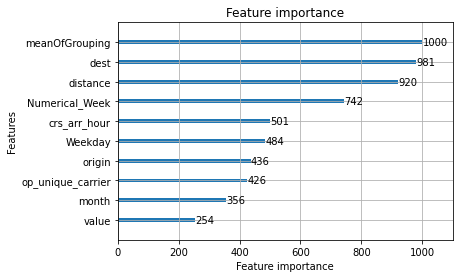

In [ ]:
lightgbm.plot_importance(model)

In [ ]:
import pandas as pd
import psycopg2
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
con = psycopg2.connect(
    host = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com',
    database='mid_term_project',
    user = 'lhl_student',
    password = 'lhl_student',
    port = 5432
)

In [ ]:
cur = con.cursor()

In [ ]:
sql = "select * from flights_test;"
dat = pd.read_sql_query(sql, con)

In [ ]:
dat['crs_arr_hour'] =dat['crs_arr_time'].astype(str).str[:2].astype(int)

In [ ]:
dat['Numerical_Week']= (pd.to_datetime(dat['fl_date']).dt.weekofyear)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
dat['crs_dep_time'] = dat['crs_dep_time'].astype(float).astype(int).apply(lambda x: '{0:0>4}'.format(x)).astype(str)
dat['crs_dep_hour'] = dat['crs_dep_time'].astype(str).str[:2].astype(int)

In [ ]:
weatherdf['fl_date'] = pd.to_datetime(weatherdf['fl_date'])

In [ ]:
dat.isna().sum()

fl_date                  0
mkt_unique_carrier       0
branded_code_share       0
mkt_carrier              0
mkt_carrier_fl_num       0
op_unique_carrier        0
tail_num              1499
op_carrier_fl_num        0
origin_airport_id        0
origin                   0
origin_city_name         0
dest_airport_id          0
dest                     0
dest_city_name           0
crs_dep_time             0
crs_arr_time             0
dup                      0
crs_elapsed_time         0
flights                  0
distance                 0
crs_arr_hour             0
Numerical_Week           0
crs_dep_hour             0
dtype: int64

In [ ]:
dat['month'] = (pd.to_datetime(dat['fl_date']).dt.month)

In [ ]:
dat['Weekday'] = pd.to_datetime(dat['fl_date']).dt.dayofweek

In [ ]:
weatherdf2['fl_date'] = pd.to_datetime(weatherdf2['fl_date'])

In [ ]:
dat = dat.merge(weatherdf2, on=['fl_date','origin'])

In [ ]:
weatherdf2

,fl_date,origin,visibility,value
0,2020-01-01,ORD,10,Overcast
1,2020-01-02,ORD,10,Partly cloudy
2,2020-01-03,ORD,10,Partly cloudy
3,2020-01-04,ORD,10,Partly cloudy
4,2020-01-05,ORD,10,Partly cloudy
...,...,...,...,...
585,2020-01-10,MSP,10,Partly cloudy
586,2020-01-11,MSP,10,Partly cloudy
587,2020-01-12,MSP,10,Partly cloudy
588,2020-01-13,MSP,10,Partly cloudy


In [ ]:
dat

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,crs_arr_hour,Numerical_Week,crs_dep_hour,month,Weekday,visibility,value
0,2020-01-01,WN,WN,WN,2029,WN,N456WN,2029,14107,PHX,"Phoenix, AZ",10140,ABQ,"Albuquerque, NM",1815,1920,N,65,1,328,19,1,18,1,2,10,Patchy rain possible
1,2020-01-01,WN,WN,WN,4692,WN,N215WN,4692,14107,PHX,"Phoenix, AZ",10140,ABQ,"Albuquerque, NM",2110,2220,N,70,1,328,22,1,21,1,2,10,Patchy rain possible
2,2020-01-01,WN,WN,WN,4738,WN,N737JW,4738,14107,PHX,"Phoenix, AZ",10140,ABQ,"Albuquerque, NM",1615,1720,N,65,1,328,17,1,16,1,2,10,Patchy rain possible
3,2020-01-01,WN,WN,WN,5099,WN,N732SW,5099,14107,PHX,"Phoenix, AZ",10140,ABQ,"Albuquerque, NM",1415,1520,N,65,1,328,15,1,14,1,2,10,Patchy rain possible
4,2020-01-01,WN,WN,WN,6658,WN,N794SW,6658,14107,PHX,"Phoenix, AZ",10140,ABQ,"Albuquerque, NM",0945,1100,N,75,1,328,11,1,9,1,2,10,Patchy rain possible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310806,2020-01-31,UA,UA_CODESHARE,UA,5970,OO,N679SA,5970,12266,IAH,"Houston, TX",12217,HSV,"Huntsville, AL",1455,1642,N,107,1,595,16,5,14,1,4,10,Cloudy
310807,2020-01-31,UA,UA_CODESHARE,UA,5971,OO,N792SK,5971,12266,IAH,"Houston, TX",10372,ASE,"Aspen, CO",1420,1620,N,180,1,913,16,5,14,1,4,10,Cloudy
310808,2020-01-31,UA,UA_CODESHARE,UA,5702,EV,N16559,3205,12266,IAH,"Houston, TX",14814,SHV,"Shreveport, LA",1620,1722,N,62,1,192,17,5,16,1,4,10,Cloudy
310809,2020-01-31,AA,AA_CODESHARE,AA,4476,YX,N408YX,4476,12266,IAH,"Houston, TX",13303,MIA,"Miami, FL",1715,2049,N,154,1,964,20,5,17,1,4,10,Cloudy


In [ ]:
datTest = dat[['op_unique_carrier','origin','dest','distance','month','value','crs_arr_hour','Numerical_Week','Weekday']].merge(mergeToTest,on=['origin','dest','Numerical_Week','crs_arr_hour'])

In [ ]:
datTest['distance']  = datTest['distance'].astype(float)

In [ ]:
X_test.dtypes

op_unique_carrier    category
origin               category
dest                 category
distance              float64
month                   int64
value                category
crs_arr_hour            int64
Numerical_Week          int64
Weekday                 int64
meanOfGrouping        float64
dtype: object

In [ ]:
datTest.dtypes

op_unique_carrier     object
origin                object
dest                  object
distance             float64
month                  int64
value                 object
crs_arr_hour           int64
Numerical_Week         int64
Weekday                int64
meanOfGrouping       float64
dtype: object

In [ ]:
datTest['op_unique_carrier'] = datTest.op_unique_carrier.astype('category')
datTest['origin'] = datTest.origin.astype('category')
datTest['dest'] = datTest.dest.astype('category')

In [ ]:
datTest['value'] = datTest.value.astype('category')

In [ ]:
ab= model.predict(datTest)

In [ ]:
310811  - len(ab)

69823

In [ ]:
len(ab)

240988

In [ ]:
pd.DataFrame(ab).describe()

,0
count,240988.000000
mean,4.528771
std,33.886972
min,-216.584530
25%,-11.890827
50%,-5.753062
75%,9.674330
max,869.656100


In [ ]:
df.arr_delay.describe()

count    588482.000000
mean          5.374638
std          43.474841
min       -1290.000000
25%         -15.000000
50%          -6.000000
75%           9.000000
max        1248.000000
Name: arr_delay, dtype: float64